##  This data set has the record of all the expenses incurred by the fifty Startups and the state where they operate. Objective of this task is to predict the profit made by a startup on the basis of expenses incurred and the state where they operate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv('50_Startups.csv')

## Performing some basic EDA to draw understanding  about the data

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.duplicated().sum()

0

In [8]:
for i in ['R&D Spend','Marketing Spend']:
    print(i)
    print(df[i].value_counts()[0])
    print(df[i].value_counts(normalize= True)[0],'\n')

R&D Spend
2
0.04 

Marketing Spend
3
0.06 



In [9]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

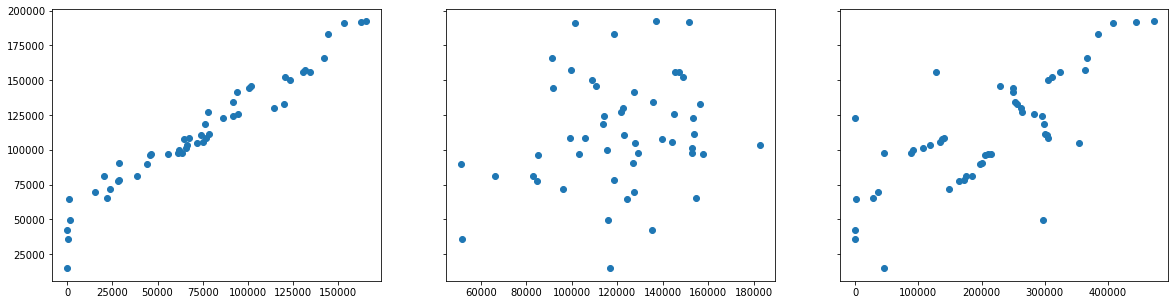

In [10]:
fig, axs = plt.subplots(1, 3,figsize=(20,5),sharey=True)

axs[0].scatter(df['R&D Spend'],df['Profit'])
axs[1].scatter(df['Administration'],df['Profit'])
axs[2].scatter(df['Marketing Spend'],df['Profit'])

<AxesSubplot:xlabel='State', ylabel='Profit'>

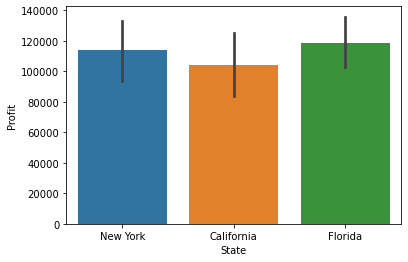

In [11]:
sns.barplot(x=df['State'],y=df['Profit'])

# Assumptions of Linear Regression

1.Linear Relation : The relationship b/w Dependent & Independent is supposed to be linear. Dependent varaibale is a linear function of independent variable & error term
2.Multicollinearity : Independence of the independent varaibles.
    
3.Errors [Residuals] are Normally Distributed i.e. Regression Model is Robust.

4.Homoscedasticity : Equal variance in the errors across dataset
    
The first two assumption needs to be checked before developing the model and the later two assumptions will be checked after fiting the model.

### 1. Linearity Assumption

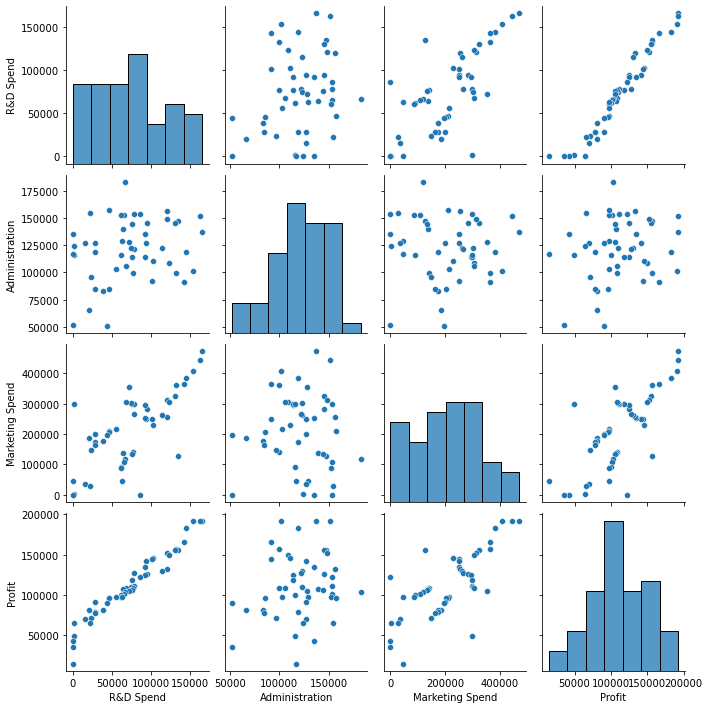

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

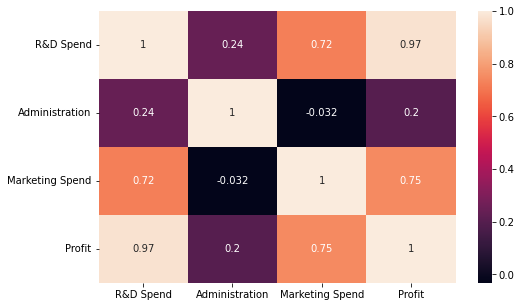

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [16]:
x_data = df.drop(columns= ['Profit','State'])
x_data['Intercept'] = 1
x_data.head()

,R&D Spend,Administration,Marketing Spend,Intercept
0,165349.20,136897.80,471784.10,1
1,162597.70,151377.59,443898.53,1
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,1
4,142107.34,91391.77,366168.42,1


In [17]:
VIF = pd.DataFrame()
VIF['Independent_Variables'] = x_data.columns
VIF['VIF'] = [vif(x_data.values, i) for i in range(x_data.shape[1])]
VIF = VIF.set_index('Independent_Variables').drop(index = 'Intercept').T
VIF

Independent_Variables,R&D Spend,Administration,Marketing Spend
VIF,2.468903,1.175091,2.326773


### Converting Categorical column to Numerical by applying get_dummies function

In [18]:
df = pd.get_dummies(df,columns=['State'],drop_first=True)

In [19]:
X = df.drop(columns=['Profit'],axis=1).values
y = df['Profit'].values

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)

In [21]:
print(X_train.shape)
print(X_test.shape)

(40, 5)
(10, 5)


In [22]:
min_scale = MinMaxScaler()

In [23]:
X_train_scaled = min_scale.fit_transform(X_train)
X_test_scaled = min_scale.transform(X_test)

In [24]:
lin_reg = LinearRegression()

In [25]:
lin_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [26]:
y_pred = lin_reg.predict(X_test_scaled)

In [27]:
print(y_pred)
print(y_test)

[103015.20159796 132582.27760816 132447.73845174  71976.09851258
 178537.48221055 116161.24230165  67851.69209676  98791.73374687
 113969.43533012 167921.0656955 ]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


In [28]:
r2_score(y_test,y_pred)

0.9347068473282425

In [29]:
np.sqrt(mean_squared_error(y_test,y_pred))

9137.99015279494

In [30]:
y_pred_tr = lin_reg.predict(X_train_scaled)

In [31]:
r2_score(y_train,y_pred_tr)

0.9501847627493607

In [32]:
np.sqrt(mean_squared_error(y_train,y_pred_tr))

9031.666612578969

In [33]:
residual = y_train-y_pred_tr

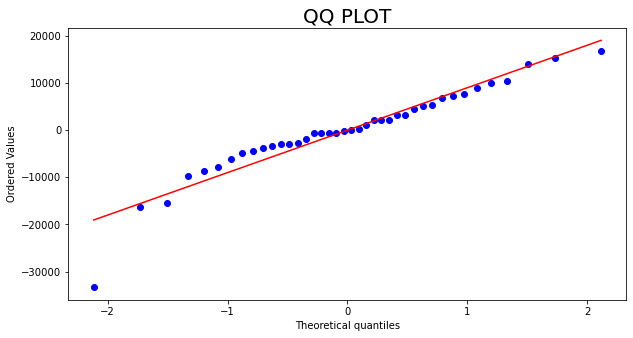

In [34]:
plt.figure(figsize = (10,5))
stats.probplot(residual, dist='norm', plot = plt)
plt.title('QQ PLOT', size = 20)
plt.show();

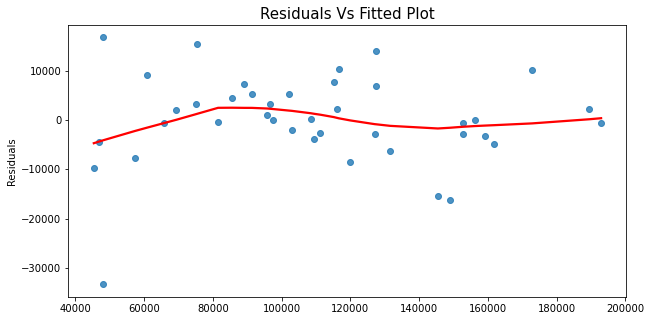

In [35]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_pred_tr,y=residual,lowess = True, line_kws={'color' : 'red'},scatter = True)
plt.ylabel('Residuals')
plt.title('Residuals Vs Fitted Plot', size = 15)
plt.show()

All the assumptions are checked and all the evaluation metrics are calculated.The best evaluation metric for this work is r2_score. R2 of 1 means the dependent variable can be predicted from the independent variable without any error. We get the r2_score as 0.95 that implies 95% variance in Y is predictable from X.